In [87]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

In [88]:
df=pd.read_csv("diabetes.csv")

In [89]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [91]:
df.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age'),
  Text(8, 0, 'Outcome')])

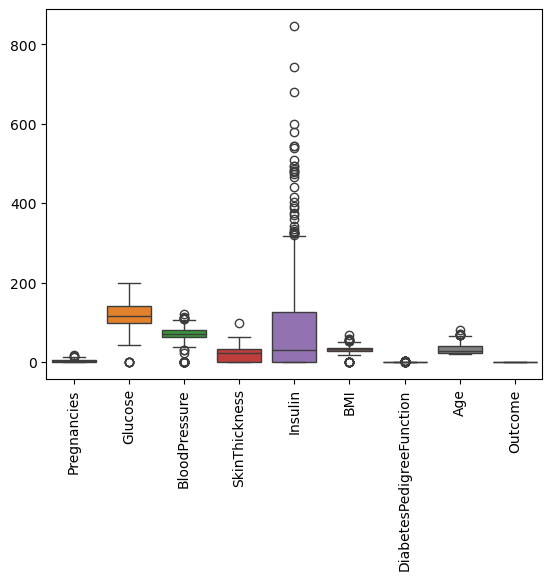

In [92]:
sns.boxplot(df)
plt.xticks(rotation=90)

<Axes: title={'center': 'Insulin'}, xlabel='Outcome'>

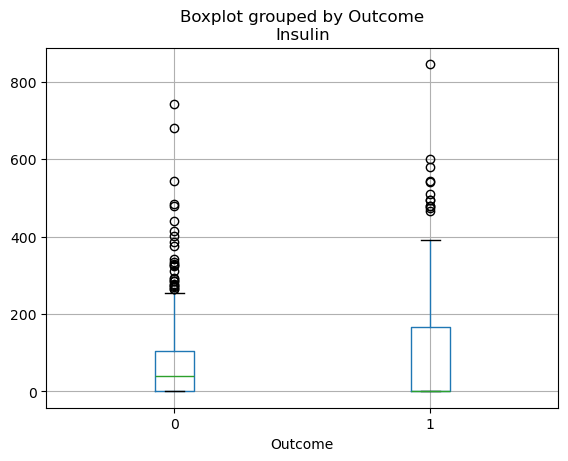

In [93]:
df.boxplot(by='Outcome', column=['Insulin'])


<Axes: title={'center': 'Glucose'}, xlabel='Outcome'>

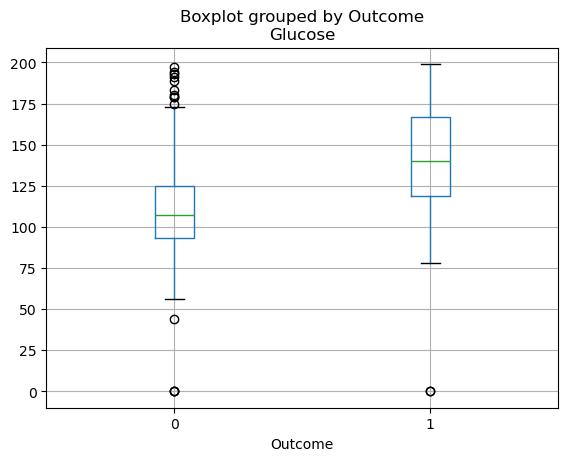

In [94]:
df.boxplot(by='Outcome', column=['Glucose'])


<Axes: title={'center': 'BMI'}, xlabel='Outcome'>

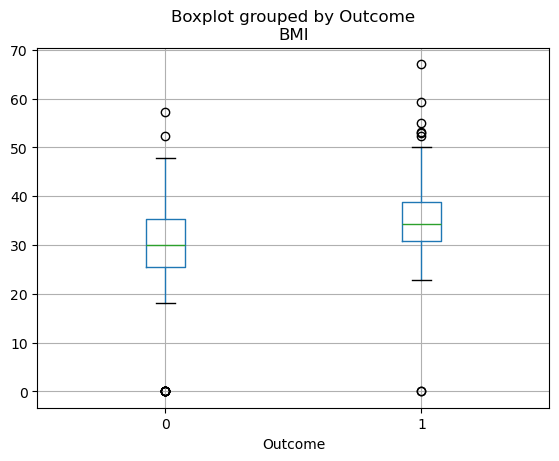

In [95]:
df.boxplot(by='Outcome', column=['BMI'])


<Axes: title={'center': 'SkinThickness'}, xlabel='Outcome'>

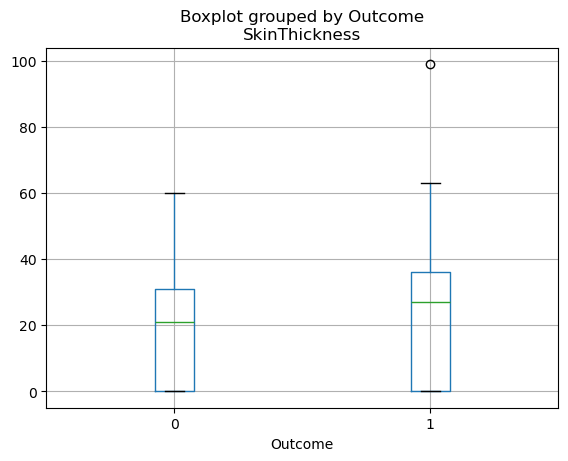

In [96]:
df.boxplot(by='Outcome', column=['SkinThickness'])


In [97]:
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


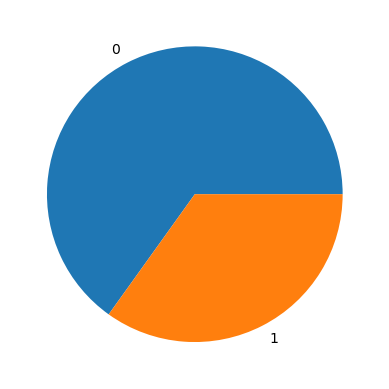

In [98]:
outcome_counts=df["Outcome"].value_counts()
plt.pie(outcome_counts, labels=outcome_counts.index)
plt.show()

In [99]:
X=df.drop('Outcome', axis=1)
y=df['Outcome']

In [100]:
x_train ,x_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [101]:
models={
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()}


Logistic Regression Results:
Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall: 0.6727272727272727
F1 Score: 0.6548672566371682

Decision Tree Results:
Accuracy: 0.7402597402597403
Precision: 0.6190476190476191
Recall: 0.7090909090909091
F1 Score: 0.6610169491525424

Random Forest Results:
Accuracy: 0.7597402597402597
Precision: 0.6666666666666666
Recall: 0.6545454545454545
F1 Score: 0.6605504587155964


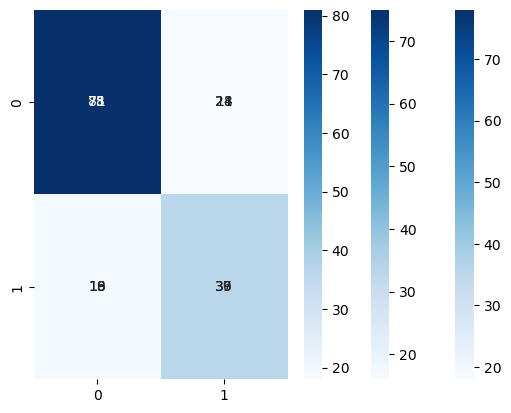

In [102]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True,cmap='Blues')

<Axes: >

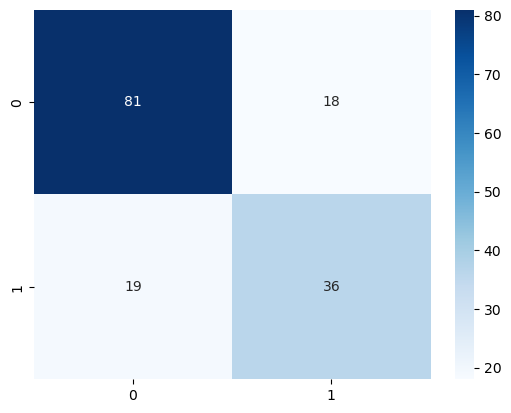

In [103]:
c=confusion_matrix(y_test, y_pred)
sns.heatmap(c, annot=True, fmt='d', cmap='Blues')

In [104]:
param_grid_lr = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
param_grid_dt = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

In [105]:
grids={
    "Logistic Regression": (LogisticRegression(max_iter=1000), param_grid_lr),
    "Decision Tree": (DecisionTreeClassifier(), param_grid_dt),
    "Random Forest": (RandomForestClassifier(), param_grid_rf)}

In [106]:
for name, (model, params) in grids.items():
    grid = GridSearchCV(model, params, cv=5, scoring='f1')
    grid.fit(x_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test)
    print(f"\n{name} After Grid:")
    print("Accuracy:", accuracy_score(y_test, y_pred)*100)
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))



Logistic Regression After Grid:
Accuracy: 75.97402597402598
Precision: 0.6607142857142857
Recall: 0.6727272727272727
F1 Score: 0.6666666666666666

Decision Tree After Grid:
Accuracy: 79.22077922077922
Precision: 0.7446808510638298
Recall: 0.6363636363636364
F1 Score: 0.6862745098039216

Random Forest After Grid:
Accuracy: 72.07792207792207
Precision: 0.6071428571428571
Recall: 0.6181818181818182
F1 Score: 0.6126126126126126


In [107]:
smote = SMOTE()
x_res, y_res = smote.fit_resample(x_train, y_train)


c:\Users\nice\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [108]:
for name, (model, params) in grids.items():
    grid = GridSearchCV(model, params, cv=5, scoring='f1')
    grid.fit(x_res, y_res)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test)
    print(f"\n{name} after smot and grid:")
    print("Accuracy:", accuracy_score(y_test, y_pred)*100)
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))


Logistic Regression after smot and grid:
Accuracy: 70.77922077922078
Precision: 0.5694444444444444
Recall: 0.7454545454545455
F1 Score: 0.6456692913385826

Decision Tree after smot and grid:
Accuracy: 71.42857142857143
Precision: 0.5753424657534246
Recall: 0.7636363636363637
F1 Score: 0.65625

Random Forest after smot and grid:
Accuracy: 75.97402597402598
Precision: 0.6363636363636364
Recall: 0.7636363636363637
F1 Score: 0.6942148760330579


# Summary
- **Decision Tree** performed best after applying **GridSearchCV**, achieving the highest accuracy and F1-Score.
- After applying **SMOTE** to handle class imbalance, **Random Forest** became the best model in terms of accuracy and the balance between precision and recall.
- One of the challenges we faced was the performance drop of Random Forest without proper hyperparameter tuning, which highlighted the importance of careful hyperparameter selection.
- We learned that using **SMOTE** combined with **hyperparameter tuning** improves model performance significantly.
- Also, we realized that the **F1-Score** is a critical metric when dealing with imbalanced datasets.